In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68390_Z')

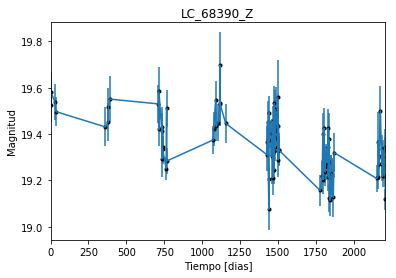

In [2]:
data = np.genfromtxt('LC_68390_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68390_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

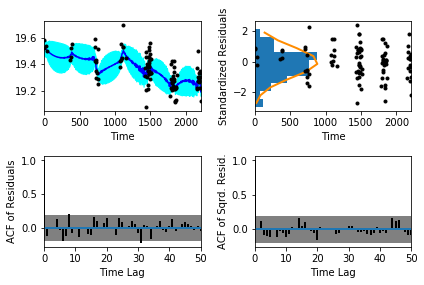

In [5]:
sample.assess_fit()

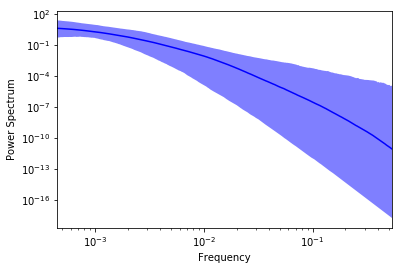

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68390_Z')

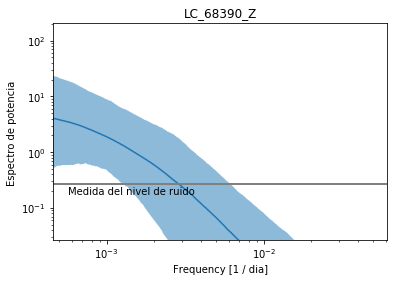

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68390_Z')

Text(0.5,1,'Prediccion , valor esperado 68390_Z')

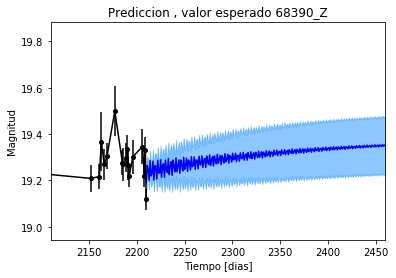

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 68390_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_68390_Z')

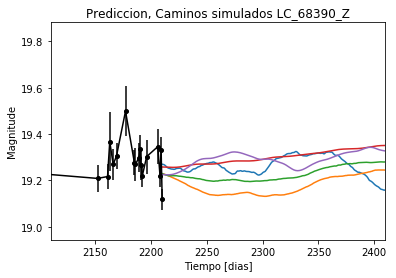

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68390_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68390_Z')

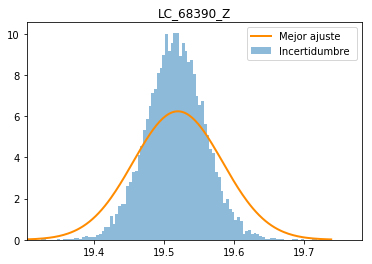

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68390_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_Z')

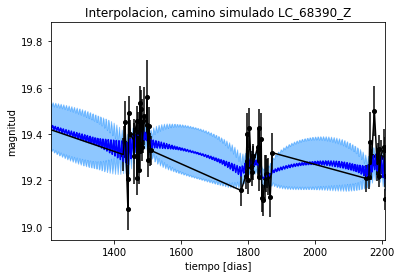

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_68390_Z')

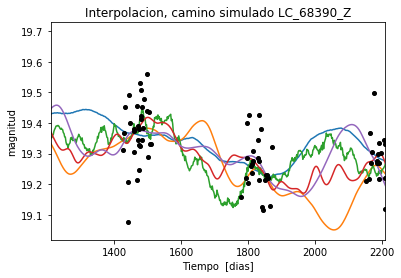

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68390_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 892.2754811
Median: 0.0137408360542
Standard deviation: 0.202615788832
68% credibility interval: [ 0.00140029  0.20382409]
95% credibility interval: [  5.35601886e-04   8.11824399e-01]
99% credibility interval: [  4.70545348e-04   9.89646252e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 672.072399323
Median: 0.00329432525363
Standard deviation: 0.0877927058695
68% credibility interval: [ 0.00067723  0.04039548]
95% credibility interval: [ 0.00047725  0.26939742]
99% credibility interval: [  4.56606389e-04   6.31218379e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1003.52197821
Median: 0.0226096873572
Standard de

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1232.41914694
Median: 160.402983076
Standard deviation: 1.59704266308
68% credibility interval: [ 158.62491117  161.449982  ]
95% credibility interval: [ 156.10497797  162.20218928]
99% credibility interval: [ 154.08410023  162.68118328]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 615.727857008
Median: 0.68769789759
Standard deviation: 2.1985727257
68% credibility interval: [ 0.08328925  3.85386323]
95% credibility interval: [ 0.02137201  7.34431503]
99% credibility interval: [  0.01565458  10.2639341 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 808.30335656
Median: 0.715156119466
Standard deviation: 10.2912373984
68% credibility interval: [  0.02636813  10.18743889]
95% credibility interval: [  1.37587630e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4181.25619354
Median: 1.03521423412e-33
Standard deviation: 4.72782015311e+140
68% credibility interval: [  1.32042740e-84   6.82979502e-06]
95% credibility interval: [  6.65756357e-121   6.27174397e+059]
99% credibility interval: [  2.16180309e-157   2.70529569e+132]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2852.65272867
Median: 19.375478158
Standard deviation: 0.0614995410419
68% credibility interval: [ 19.32485219  19.42841476]
95% credibility interval: [ 19.25955102  19.50428416]
99% credibility interval: [ 19.18491029  19.56873877]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 544.952104479
Median: 0.0200403866924
Standard deviation: 0.26713402063
68% credibility interval: [ 0.          0.43399981]
95% credibility interval: [ 0.          0.93550926]
99% credibility interval: [ 0.          1.04380975]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 544.952104479
Median: 0.0200403866924
Standard deviation: 0.26713402063
68% credibility interval: [ 0.          0.43399981]
95% credibility interval: [ 0.          0.93550926]
99% credibility interval: [ 0.          1.04380975]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2212.06445301
Median: 0.0
Standard deviation: 0.000616547077955
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1232.41914694
Median: 160.402983076
Standard deviation: 1.59704266308
68% credibility interval: [ 158.62491117  161.449982  ]
95% credibility interval: [ 156.10497797  162.20218928]
99% credibility interval: [ 154.08410023  162.68118328]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2535.33892617
Median: 0.0128813903824
Standard deviation: 0.0154861018349
68% credibility interval: [ 0.00734838  0.02521268]
95% credibility interval: [ 0.00442903  0.0552044 ]
99% credibility interval: [ 0.00325327  0.09585561]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1104.03391785
Median: 1.23720552819
Standard deviation: 0.160563068979
68% credibility interval: [ 1.09033533  1.40799083]
95% credibility interval: [ 0.96817983  1.59582364]
99% credibility interval: [ 0.89983533  1.72106983]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 503.07058727
Median: 0.000277613142381
Standard deviation: 0.151487942311
68% credibility interval: [  2.03612406e-06   1.04668884e-02]
95% credibility interval: [  2.55965407e-62   2.70335913e-01]
99% credibility interval: [  3.95056843e-138   1.14301470e+000]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 892.2754811
Median: (-0.0863362192041-0.257816808845j)
Standard deviation: 2.10663634384
68% credibility interval: [-1.28066455+0.j         -0.00879826-0.01180681j]
95% credibility interval: [ -5.10084314e+00+0.j         -3.36528590e-03-0.1024636j]
99% credibility interval: [ -6.21813079e+00 -6.26583185e+00j  -2.95652362e-03 -2.85517319e-03j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 672.072399323
Median: (-0.0206988560307+0.14059668644j)
Standard deviation: 1.76677254201
68% credibility interval: [-0.25381231+4.95661563j -0.00425517+0.j        ]
95% credibility interval: [-1.69267390 +2.92194512e+00j -0.00299866 +4.09003207e-05j]
99% credibility interval: [ -3.96606204e+00+1.69300156j  -2.86894256e-03+0.j       